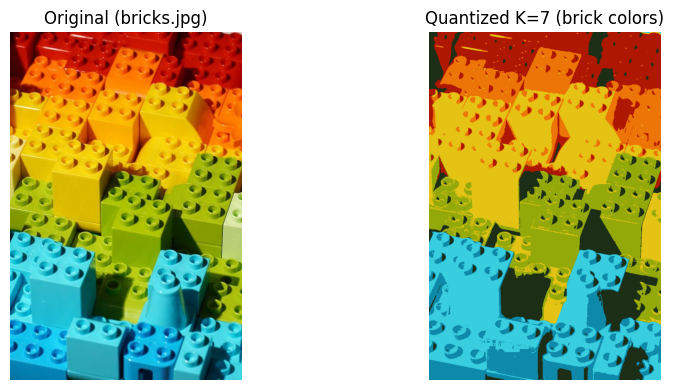

Saved: bricks_quantized_K7.png | Compactness: 937437791.8821977


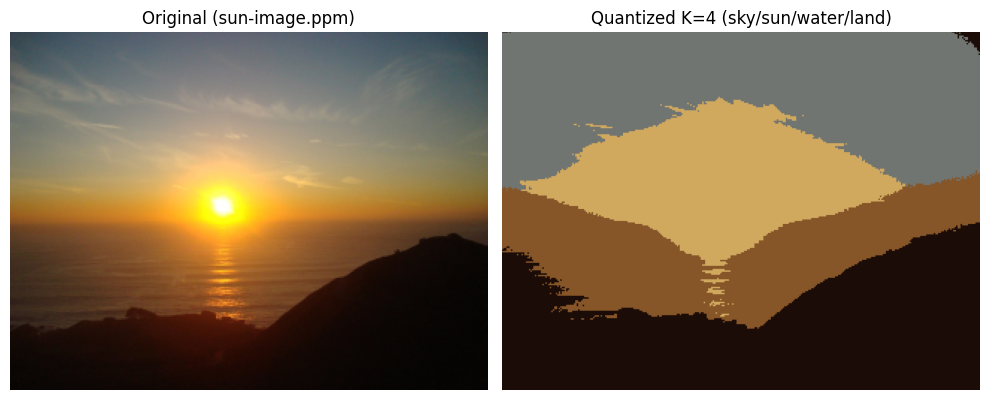

Saved: sun_quantized_K4.png | Compactness: 120977370.01761043


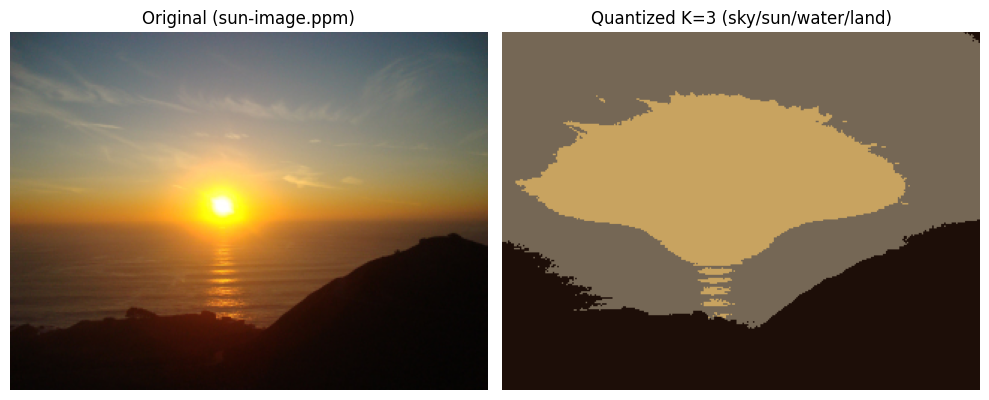

Saved: sun_quantized_K4.png | Compactness: 178070976.9624673


In [8]:
# --- OpenCV k-means color quantization
!pip -q install opencv-python matplotlib

from cv2 import (kmeans, TERM_CRITERIA_MAX_ITER, TERM_CRITERIA_EPS,
                 KMEANS_RANDOM_CENTERS, imread, cvtColor, COLOR_BGR2RGB)
import numpy as np
from numpy import float32, uint8, unique
import matplotlib.pyplot as plt
import os, urllib.request

# Downloading the two images
os.makedirs("imgs", exist_ok=True)
srcs = {
    "imgs/bricks.jpg": "https://www.ecst.csuchico.edu/~sbsiewert/csci581/code/kmeans_linux/bricks.jpg",
    "imgs/sun-image.ppm": "https://www.ecst.csuchico.edu/~sbsiewert/csci581/code/kmeans_linux/sun-image.ppm",
}
for out_path, url in srcs.items():
    if not os.path.exists(out_path):
        urllib.request.urlretrieve(url, out_path)

def quantize_and_show(img_path, K, attempts, out_png, subtitle=""):
    # Reading the image from disk using OpenCV (pixels are in BGR order)
    img_bgr = imread(img_path)
    if img_bgr is None:
        raise FileNotFoundError(img_path)
    img_rgb = cvtColor(img_bgr, COLOR_BGR2RGB) #Converting BGR->RGB solely for correct display with Matplotlib.


    # Preparing Mx3 float32 for cv.kmeans
    data = img_rgb.reshape(-1, 3).astype(float32) # Reshaping image from H×W×3 into (H*W)×3 matrix so each row = one pixel [R,G,B].
    criteria = (TERM_CRITERIA_MAX_ITER + TERM_CRITERIA_EPS, 10, 1.0) #termination criteria: stopping after max_iter = 10 iterations OR stopping when centroid movement < epsilon = 1.0
    #Running OpenCV k-means on the flattened pixel matrix:
    compactness, labels, centers = kmeans( # (M x 3) float32 array; M = H*W pixels; each row is [R,G,B]
        data=data, K=K, bestLabels=None, # k in number of clusters and with bestLabels as none so that opencv initializes labelsb interrnally
        criteria=criteria, attempts=attempts, # criteria for max tier and number of attempts
        flags=KMEANS_RANDOM_CENTERS # picking initial centers
    )

    quant = centers[labels].reshape(img_rgb.shape).astype(uint8)

    # Side-by-side and save PNG (screenshot)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title(f"Original ({os.path.basename(img_path)})"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(quant);   plt.title(f"Quantized K={K} {subtitle}");             plt.axis("off")
    plt.tight_layout()
    plt.savefig(out_png, dpi=200, bbox_inches="tight")
    plt.show()
    print(f"Saved: {out_png} | Compactness: {float(compactness)}")

# Legos: segmenting by brick colors (we can change K if we want more/fewer color groups)
quantize_and_show("imgs/bricks.jpg", K=7, attempts=10,
                  out_png="bricks_quantized_K7.png",
                  subtitle="(brick colors)")

# Sun: segment sky / sun(glow) / water / land
quantize_and_show("imgs/sun-image.ppm", K=4, attempts=10,
                  out_png="sun_quantized_K4.png",
                  subtitle="(sky/sun/water/land)")

quantize_and_show("imgs/sun-image.ppm", K=3, attempts=10,
                  out_png="sun_quantized_K4.png",
                  subtitle="(sky/sun/water/land)")
